In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling    #  EDA benzeri dosya hazirliyor
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
df= sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# species kaldirip clustering makina yapacak -  sonunda karsilastirma yapacagiz

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# k means algorithm requires scaling!!

In [7]:
# describe tablosuna gore degerler arasinda ucuk farklar yok - bu dataset're scaling olmasa da olabilir
# km ile hp olsa, scaling gerekebilirdi

In [8]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


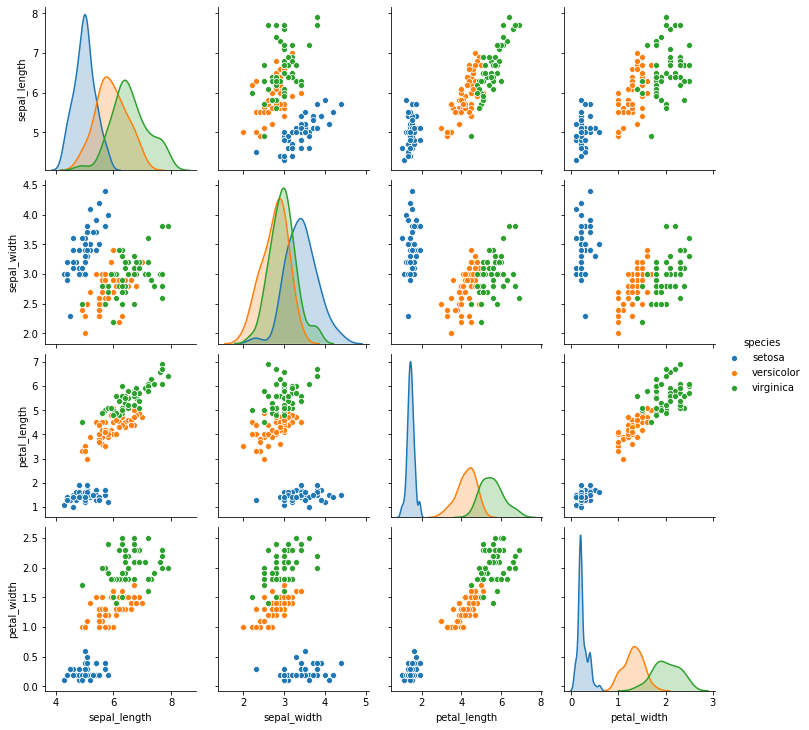

In [10]:
sns.pairplot(df, hue = 'species')
plt.show();

In [11]:
# setosa ayi bir cluster; diger iki species biraz daha grift

In [12]:
X = df.drop('species', axis=1)

In [13]:
X.shape

(150, 4)

In [14]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


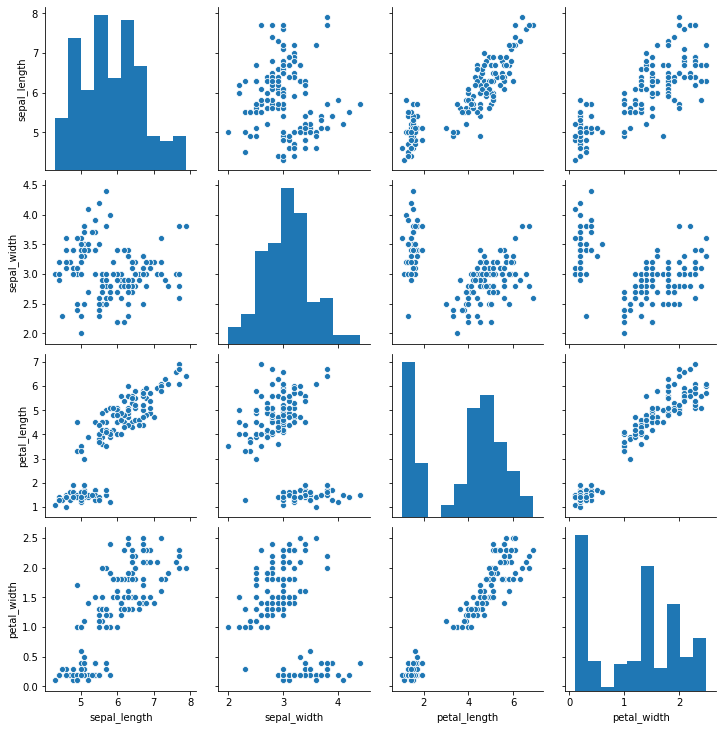

In [15]:
sns.pairplot(X);

In [16]:
# hue kulanamayinca 2 cluster gibi gorunuyor

**Hopkins Test**

In [17]:
# 0'a yakin olmasi (pozitif olmali) clustering tendency oldugunu gosterir. 0.3'un uzeri olmasi uniform distro - not clustering.

In [18]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


In [19]:
from pyclustertend import hopkins

In [20]:
hopkins(X, X.shape[0])  # X.shape[0] 150 demek

0.17404742625876593

**Elbow Method**

In [21]:
# sum of squared distances

In [23]:
ssd = []

K = range(1, 10)

for k in K:
    model = KMeans(n_clusters = k)
    model.fit(X)
    ssd.append(model.inertia_)

inertia_ : float
    Sum of squared distances of samples to their closest cluster center.

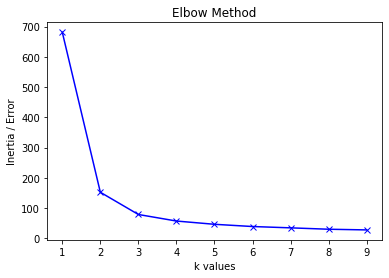

In [24]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k values')
plt.ylabel('Inertia / Error')
plt.title('Elbow Method');

In [26]:
ssd

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.066035353535355,
 34.70861343656344,
 30.112388528138535,
 27.862911312371843]

In [27]:
model = KMeans(n_clusters = 3)
model.fit(X)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
model.inertia_

78.85144142614601

In [29]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [30]:
clusters = model.labels_

In [31]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [32]:
df['predicted_clusters'] = clusters

In [33]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1


In [36]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
51,6.4,3.2,4.5,1.5,versicolor,0
10,5.4,3.7,1.5,0.2,setosa,1
72,6.3,2.5,4.9,1.5,versicolor,0
95,5.7,3.0,4.2,1.2,versicolor,0
36,5.5,3.5,1.3,0.2,setosa,1


In [37]:
# 2 column arasindaki farki gormek icin crosstab() fonksiyonu kullaniriz
ct = pd.crosstab(df.predicted_clusters, df.species)

In [38]:
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


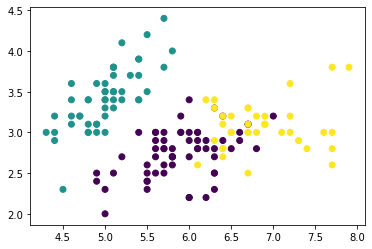

In [39]:
plt.scatter(df.iloc[:, 0], df.iloc[:,1], c =clusters, cmap = 'viridis');

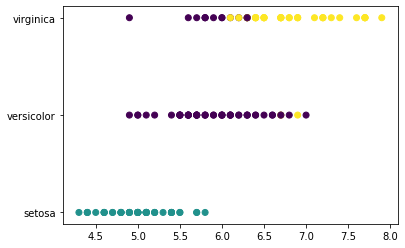

In [41]:
plt.scatter(df.iloc[:,0], df.iloc[:,4], c=clusters, cmap="viridis");

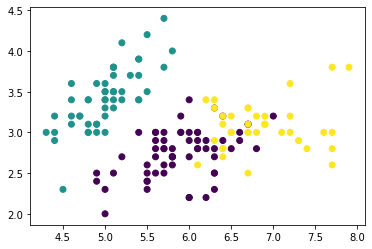

In [43]:
plt.scatter(df.sepal_length,df.sepal_width,c=clusters, cmap ="viridis");

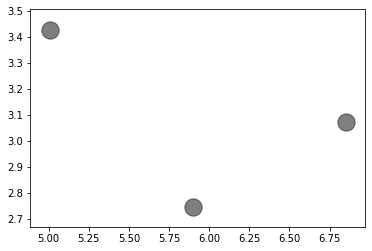

In [47]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

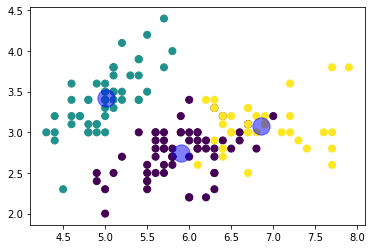

In [48]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=300, alpha=0.5);